# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\osutr_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


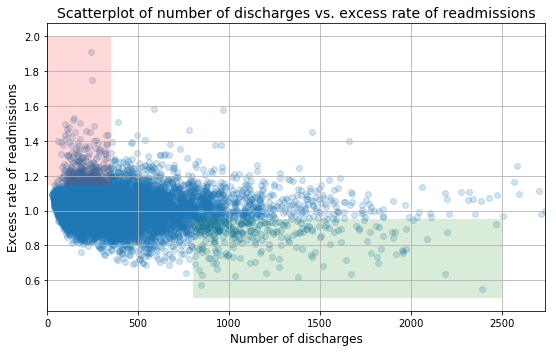

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


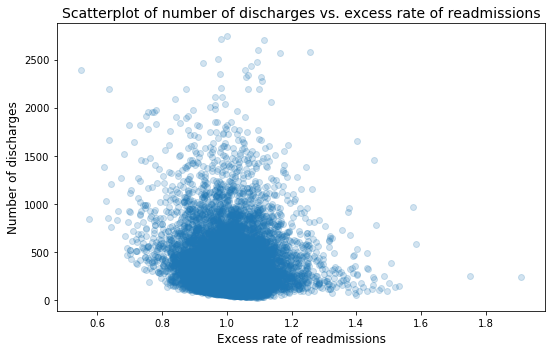

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
y = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
x = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_ylabel('Number of discharges', fontsize=12)
ax.set_xlabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

fig.tight_layout()

In [7]:
#Total sample
df_tot = clean_hospital_read_df['Excess Readmission Ratio']
mean_total = df_tot.mean()
std_total = np.std(df_tot)
print('Total sample mean ', mean_total)
print('Total sample standard deviation ', std_total)

Total sample mean  1.0075037835957146
Total sample standard deviation  0.09196026645631224


In [8]:
#Group 1: Capacity 0-100 discharges
df0 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df1 = df0[df0['Number of Discharges']<=100]
df1 = df1['Excess Readmission Ratio']
mean1 = df1.mean()
std1 = np.std(df1)
print('sample mean of Group 1 ', mean1)
print('sample standard deviation of Group 1 ', std1)

sample mean of Group 1  1.0220883892068686
sample standard deviation of Group 1  0.05813067690124139


In [9]:
#Group 2: Capacity 101-500 discharges
df0 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df2 = df0[(df0['Number of Discharges']<=500) & (df0['Number of Discharges']>100)]
df2 = df2['Excess Readmission Ratio']
mean2 = df2.mean()
std2 = np.std(df2)
print('sample mean of Group 2 ', mean2)
print('sample standard deviation of Group 2 ', std2)

sample mean of Group 2  1.009277702438384
sample standard deviation of Group 2  0.09025701396841017


In [10]:
#Group 3: Capacity 501-1000 discharges
df0 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df3 = df0[(df0['Number of Discharges']<=1000) & (df0['Number of Discharges']>500)]
df3 = df3['Excess Readmission Ratio']
mean3 = df3.mean()
std3 = np.std(df3)
print('sample mean of Group 3 ', mean3)
print('sample standard deviation of Group 3 ', std3)

sample mean of Group 3  0.9991302054155019
sample standard deviation of Group 3  0.1039321348450959


In [11]:
#Group 4: Capacity 1000+ discharges
df0 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df4 = df0[df0['Number of Discharges']>1000]
df4 = df4['Excess Readmission Ratio']
mean4 = df4.mean()
std4 = np.std(df4)
print('sample mean of Group 4 ', mean4)
print('sample standard deviation of Group 4 ', std4)

sample mean of Group 4  0.9783354211663071
sample standard deviation of Group 4  0.11987768585552241


In [15]:
n1 = len(df1.index)
n4 = len(df4.index)

In [16]:
#T-test of two populations because the population std. deviation is not known
#99% CI interval of difference between the male and female populations
mu = mean4 - mean1
sigma = np.sqrt((std4**2/n4)+(std1**2/n1))
z_stat = 2.58 #from z-table

lcl = mu - (z_stat*sigma)
ucl = mu + (z_stat*sigma)

lcl, ucl

(-0.058714640063458466, -0.028791296017664537)

## Observation
* The authors claim that the larger capacity hospitals have lower Excess Readmission Ratio (ERR) is substantiated. My analysis confirms that the ERR's for Group 1 > Group 2 > Group 3 > Group 4

* We can be 99% confident that the mean ERR of Group 4 is between .0287 and .0587 less than Group 1.

In [12]:
df = clean_hospital_read_df
# Is there a correlation between Excess Readmission Ratio (ERR) and State?
df[['State', 'Excess Readmission Ratio']].groupby('State').mean().sort_values('Excess Readmission Ratio')

,Excess Readmission Ratio
State,
SD,0.909824
MT,0.910461
ID,0.918378
ND,0.919466
NE,0.931769
OR,0.943070
VT,0.947548
UT,0.951774
CO,0.952012


## Observation
18 of 23 states west of the Mississipi River have a Excess Readmission Ratio below 1. The five exceptions are Oklahoma, Missouri, Arkansas, Louisiana, and Nevada. Of the five exceptions, only Nevada is geographically distant.

In [13]:
df = clean_hospital_read_df
# Is there a correlation between Measure Name and ERR?
df[['Measure Name', 'Excess Readmission Ratio']].groupby('Measure Name').mean().sort_values('Excess Readmission Ratio')

,Excess Readmission Ratio
Measure Name,
READM-30-HF-HRRP,1.003460
READM-30-COPD-HRRP,1.004288
READM-30-PN-HRRP,1.004785
READM-30-AMI-HRRP,1.007526
READM-30-HIP-KNEE-HRRP,1.027759


## Observation
Hip-Knee procedures were notably higher than the other 4 procedures.

### Conclusion
* There is no indication that ERR declined over time, or discharge rates increased over time. This is because data values were cumulated over a three year segment and reported as a sum amount by Hospital name.
* Nearly 1/3 of the data points did not have a discharge rate (capacity), and were 'cleaned out' which makes you question the validity of the data source
* From my own quick analysis I have demonstrated a correlation between geographical location and ERR. More data would be required to find the cause of this effect, but it shows there are other factors to consider.
* The scatter plot was effective in showing the correlation between the two variables, ERR and Capacity. However the placement of the red/green boxes was misleading. 
* Furthemore, the conclusion that "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions" is not supported by the chart or preliminary analysis. There is no evidence to assume equipment is the cause. The cause for readmission could be patient rehabilitation care, age or condition of the patient, misuse of medication, or even communication with the patient. 
* In conclusion the recommendation provided by the original author is careless and poorly supported. I would advise the client to do further analysis into the cause of the two correlated variables, ERR and capacity, before following either of the authors recommendations.